In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import recall_score,accuracy_score,precision_score,roc_auc_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
data=pd.read_excel('C:/Users/Vinay/Desktop/Supriya/Desktop/DataSet/ALF_Data.xlsx')

In [3]:
data.shape

(8785, 30)

In [4]:
data.head()

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0


In [5]:
data.describe()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
count,8785.000000,8591.000000,8594.000000,8495.000000,8495.000000,8471.000000,8481.000000,8409.000000,8768.000000,8767.000000,...,8222.000000,8785.000000,8705.000000,8785.000000,8783.000000,8785.000000,8763.00000,8779.000000,8750.000000,6000.000000
mean,49.349915,79.100198,167.028124,28.296022,0.315951,96.845178,125.832213,71.516827,51.822536,152.587544,...,0.063610,0.304041,0.402412,0.233238,0.111351,0.311781,0.06653,0.020503,0.029029,0.077333
std,18.831309,19.406975,10.103450,6.184846,0.464921,15.101170,21.046860,12.672351,15.789131,42.976096,...,0.244071,0.460026,0.490412,0.422917,0.314585,0.463247,0.24922,0.141723,0.167896,0.267142
min,20.000000,25.600000,130.400000,12.040000,0.000000,58.500000,72.000000,10.000000,8.000000,27.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,33.000000,65.400000,159.700000,24.080000,0.000000,86.200000,111.000000,64.000000,41.000000,123.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,47.000000,76.800000,166.600000,27.360000,0.000000,96.300000,122.000000,72.000000,49.000000,149.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,65.000000,89.550000,174.200000,31.380000,1.000000,106.100000,136.000000,79.000000,60.000000,177.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
max,85.000000,193.300000,200.100000,66.440000,1.000000,173.400000,233.000000,132.000000,160.000000,684.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [6]:
# Delete instances where Target(ALF) is NULL
data=data.dropna(axis=0,subset=['ALF'])
# Delete Columns
data=data.drop(['Income', 'Unmarried','Education'],axis=1)

In [7]:
data['Source of Care'].replace(to_replace=' ',value='N/A',inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 27 columns):
Age                       6000 non-null int64
Gender                    6000 non-null object
Region                    6000 non-null object
Weight                    5867 non-null float64
Height                    5861 non-null float64
Body Mass Index           5794 non-null float64
Obesity                   5794 non-null float64
Waist                     5785 non-null float64
Maximum Blood Pressure    5794 non-null float64
Minimum Blood Pressure    5748 non-null float64
Good Cholesterol          5992 non-null float64
Bad Cholesterol           5992 non-null float64
Total Cholesterol         5994 non-null float64
Dyslipidemia              6000 non-null int64
PVD                       6000 non-null int64
Physical Activity         5992 non-null float64
Source of Care            6000 non-null object
PoorVision                5624 non-null float64
Alcohol Consumption       6000 non-nul

In [9]:
cont_cols=['Age','Weight','Height','Body Mass Index','Waist','Maximum Blood Pressure','Minimum Blood Pressure',
          'Good Cholesterol','Bad Cholesterol','Total Cholesterol']
disc_bin_cols=['Region','Gender','Dyslipidemia', 'PVD', 'Physical Activity', 'Source of Care','Alcohol Consumption',
          'HyperTension', 'Family  HyperTension','Diabetes', 'Family Diabetes', 'Hepatitis', 'Family Hepatitis',
          'Chronic Fatigue', 'Obesity', 'PoorVision']

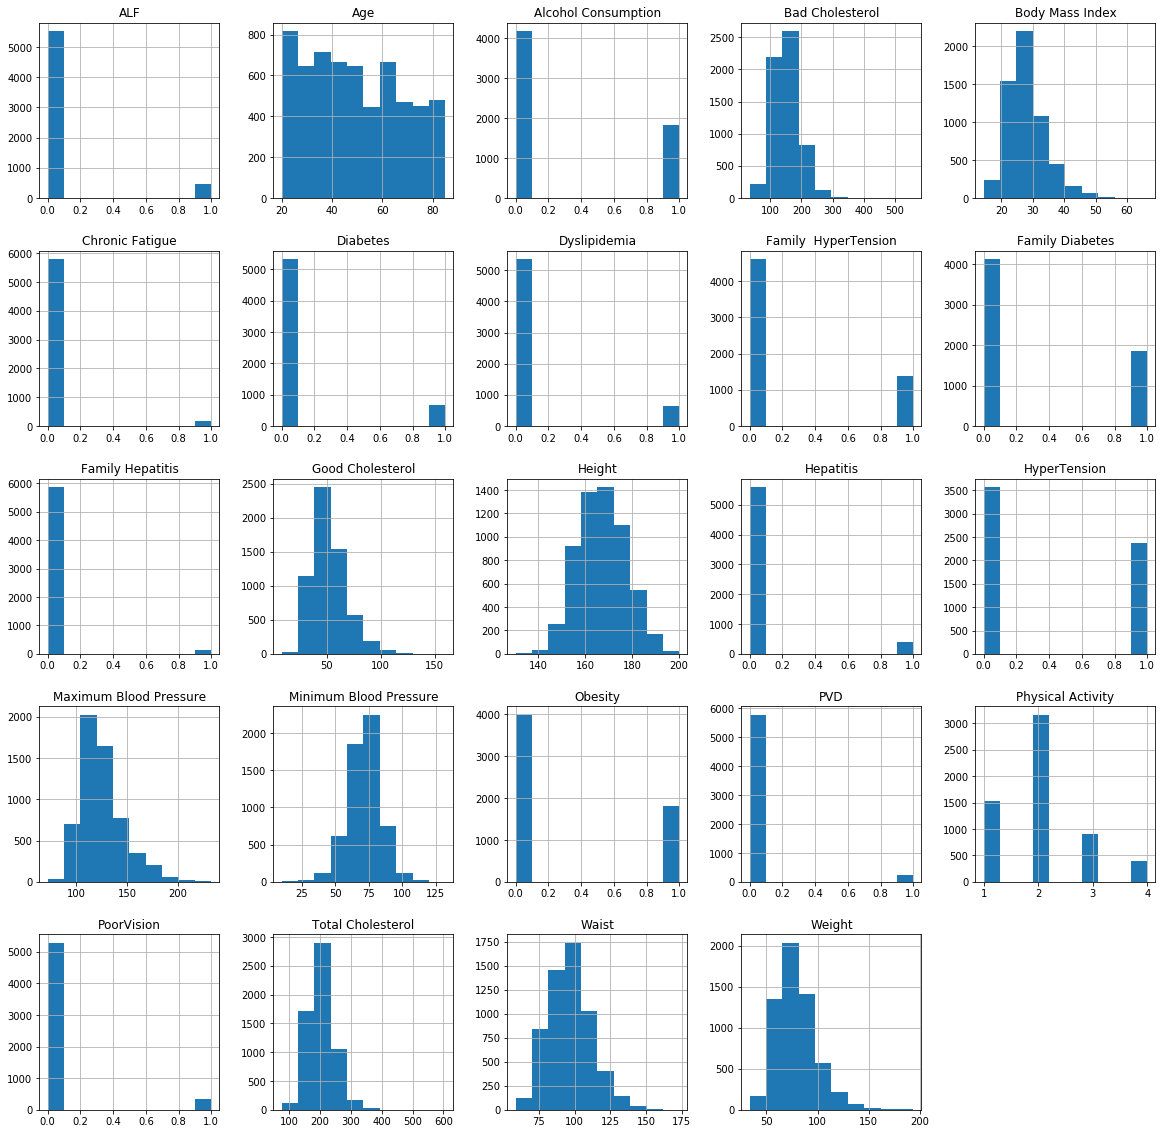

In [10]:
data.hist(figsize=(20,20))
plt.show()

In [11]:
# Data Imputation
# Columns that have skewed distribution 
#['Weight','Body Mass Index','Waist','Maximum Blood Pressure','Good Cholesterol','Bad Cholesterol','Total Cholesterol']
# impute using median
median=['Weight','Body Mass Index','Waist','Maximum Blood Pressure','Good Cholesterol','Bad Cholesterol',
        'Total Cholesterol']
for i in median:
    data[i].fillna(value=data[i].median(), inplace=True)
# impute using mean
for i in ['Height','Minimum Blood Pressure']:
    data[i].fillna(value=data[i].mean(), inplace=True)
# impute using mode
# data imputation using mode
for i in ['Chronic Fatigue','Family Hepatitis','Hepatitis','Diabetes','HyperTension','PoorVision','Physical Activity']:
    data[i].fillna(value=data[i].mode()[0], inplace=True)
# imputing Obesity column
BMI_mean=data['Body Mass Index'].median()
#BMI_median =27.28( less than 30 therefore not Obese)
data['Obesity'].fillna(value=0, inplace=True)

In [107]:
data['ALF'][data['ALF']==0].shape[0],data['ALF'][data['ALF']==1].shape[0]

(5536, 464)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 27 columns):
Age                       6000 non-null int64
Gender                    6000 non-null object
Region                    6000 non-null object
Weight                    6000 non-null float64
Height                    6000 non-null float64
Body Mass Index           6000 non-null float64
Obesity                   6000 non-null float64
Waist                     6000 non-null float64
Maximum Blood Pressure    6000 non-null float64
Minimum Blood Pressure    6000 non-null float64
Good Cholesterol          6000 non-null float64
Bad Cholesterol           6000 non-null float64
Total Cholesterol         6000 non-null float64
Dyslipidemia              6000 non-null int64
PVD                       6000 non-null int64
Physical Activity         6000 non-null float64
Source of Care            6000 non-null object
PoorVision                6000 non-null float64
Alcohol Consumption       6000 non-nul

In [14]:
lis=['Dyslipidemia', 'PVD', 'Physical Activity','Alcohol Consumption',
          'HyperTension', 'Family  HyperTension','Diabetes', 'Family Diabetes', 'Hepatitis', 'Family Hepatitis',
          'Chronic Fatigue', 'Obesity', 'PoorVision']
di={i:lis[i] for i in range(0,13)}

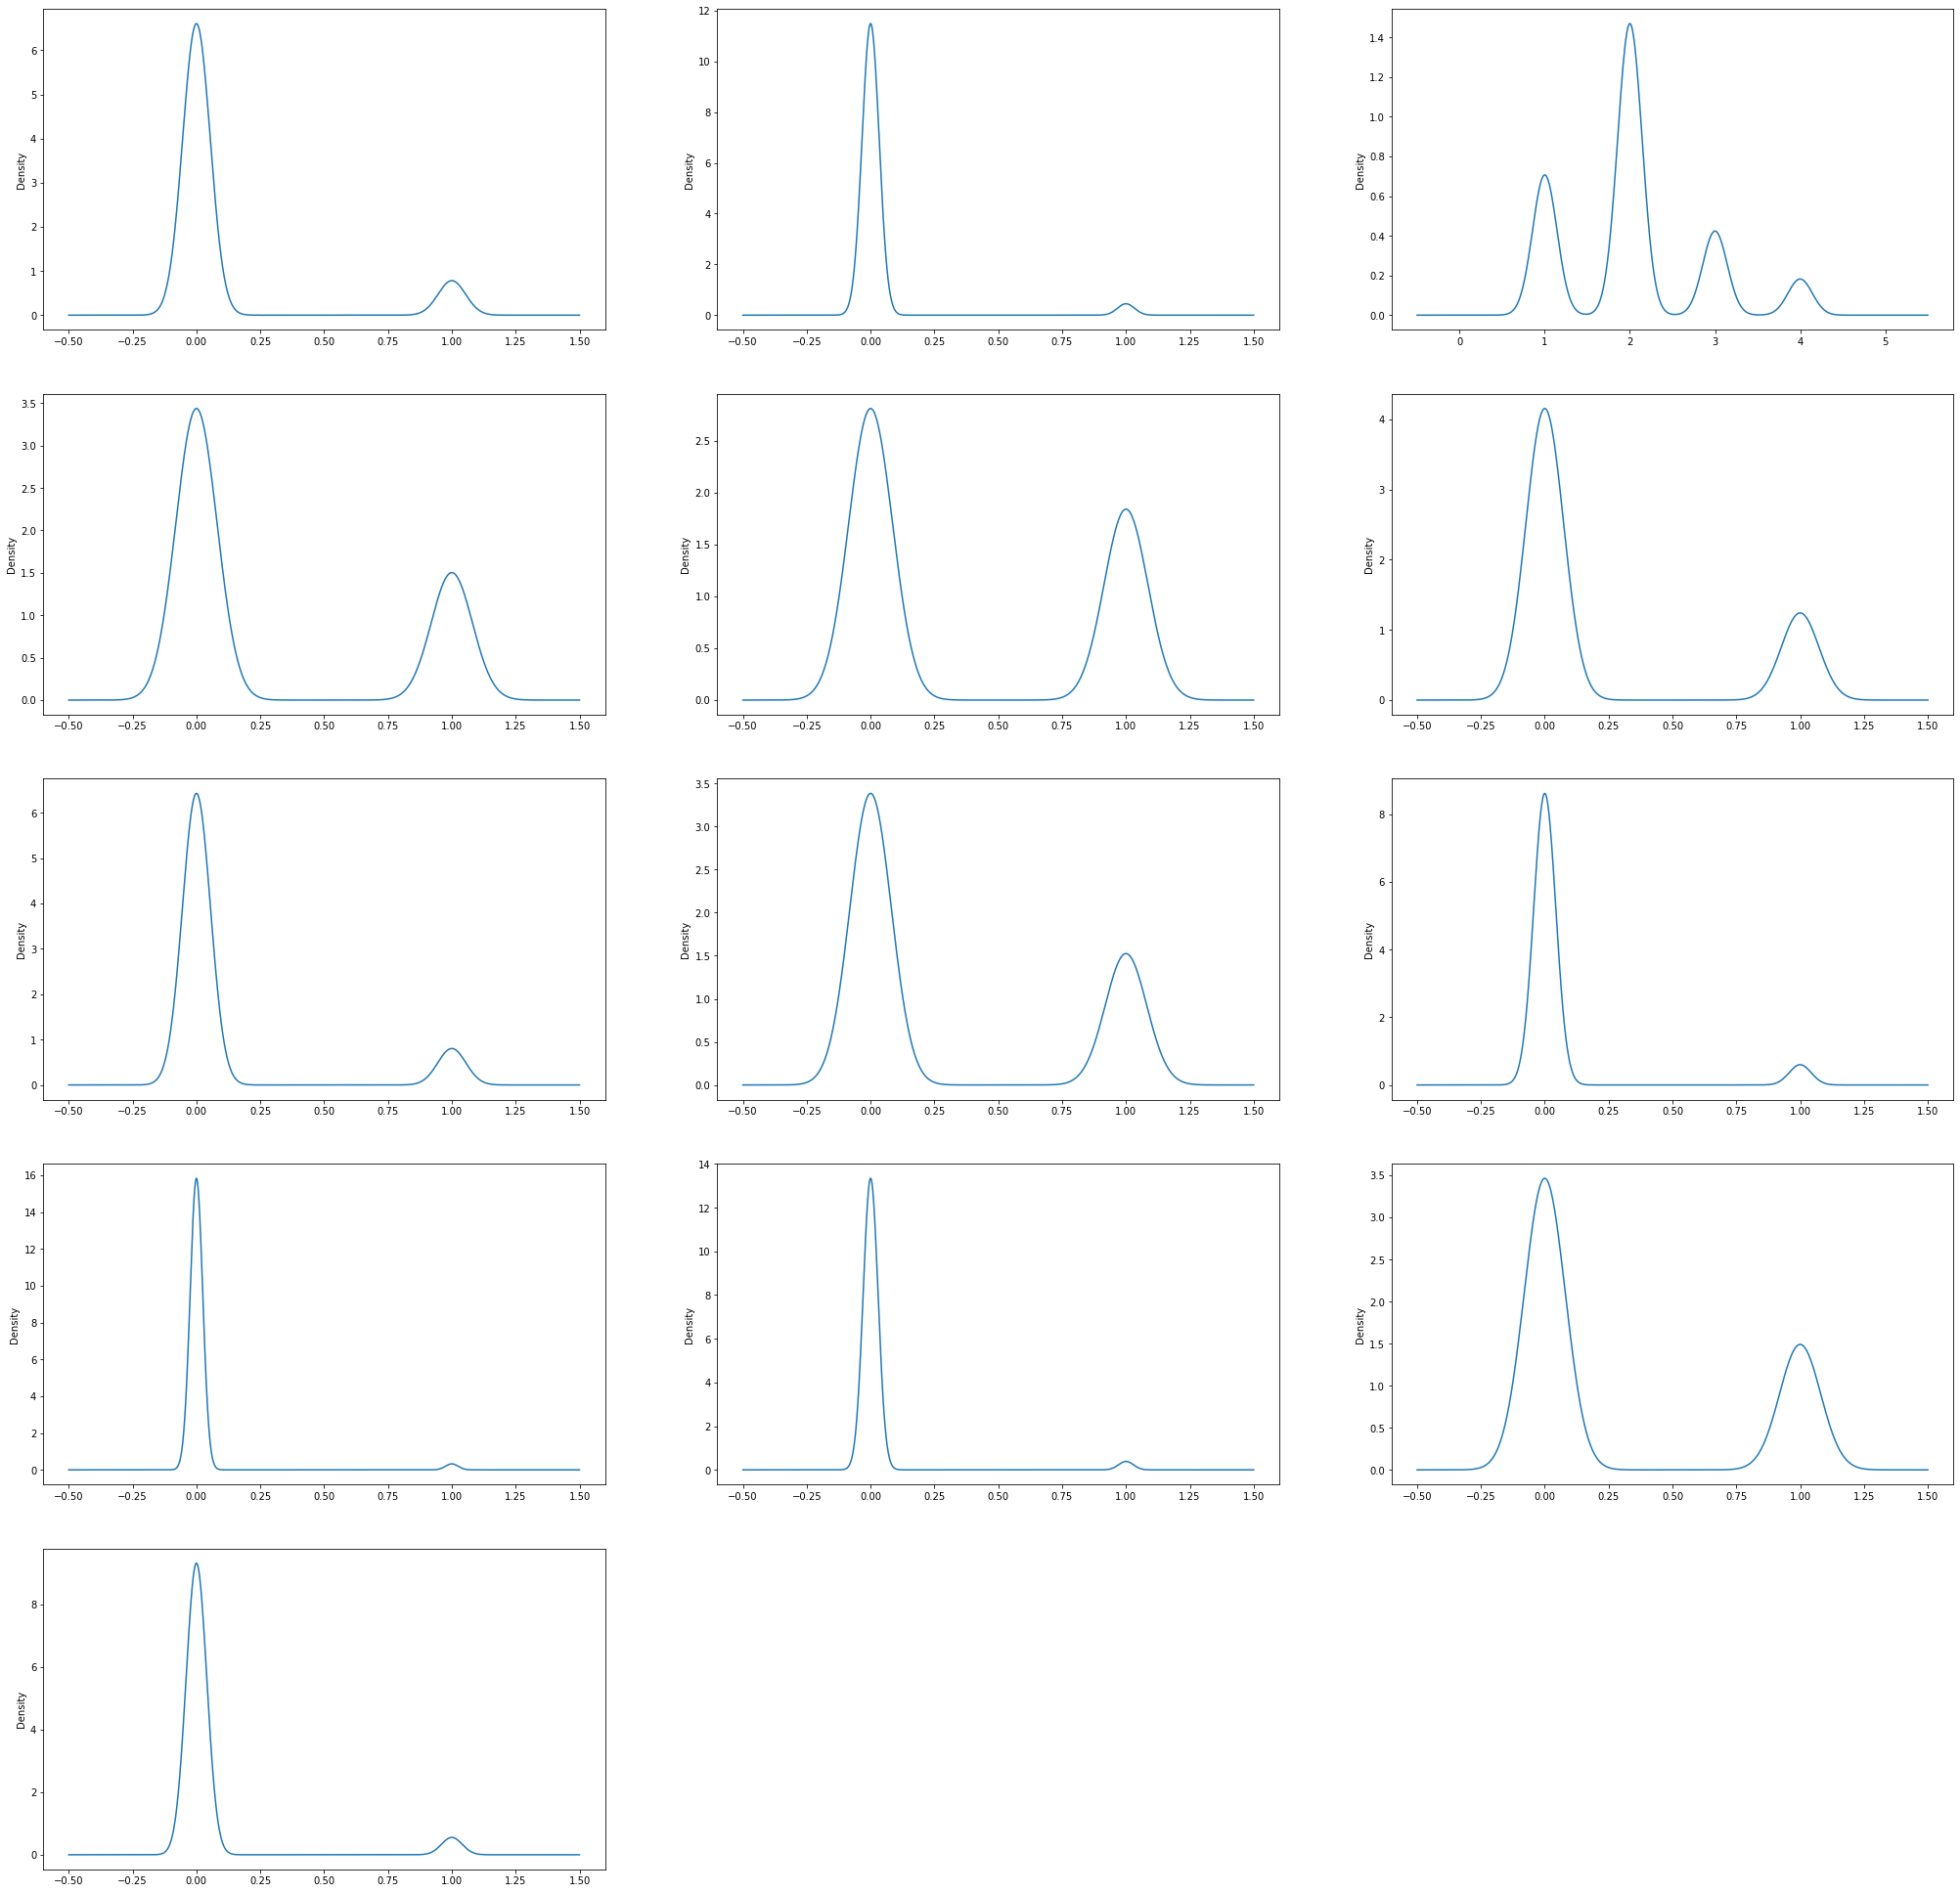

In [15]:
plt.figure(figsize=(35,35))
for i, j in zip(di.keys(), di.values()):
    plt.subplot(5, 3, i+1)
    data[j].plot(kind='kde') #gaussian kernel density estimate
plt.show()

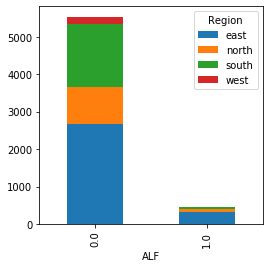

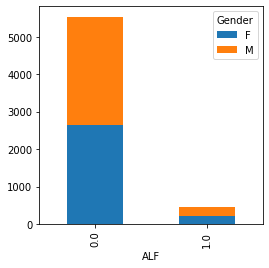

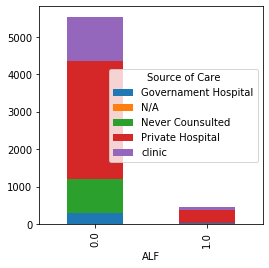

In [16]:
lis1=['Region','Gender','Source of Care']
di1={i+1:lis1[i] for i in range(0,3)}
for i, j in zip(di1.keys(), di1.values()):
    d=pd.crosstab(index=data['ALF'],columns=data[j])
    d.plot(kind="bar",figsize=(4,4),stacked=True)
    plt.show()


In [17]:
data.head()

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,71.0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,52.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,57.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,57.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,73.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0


In [18]:
LE= preprocessing.LabelEncoder()
data_LE=data.copy()
data_LE[['Gender', 'Region', 'Source of Care']]=data_LE[['Gender', 'Region', 'Source of Care']] .apply(LE.fit_transform)
data_LE.head()

,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,65,1,0,56.0,162.1,21.31,0.0,83.6,135.0,71.0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0.0
1,36,1,2,60.2,162.2,22.88,0.0,76.6,96.0,52.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
2,66,1,0,83.9,162.5,31.77,1.0,113.2,115.0,57.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0.0
3,54,1,0,69.4,160.5,26.94,0.0,77.9,110.0,57.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0
4,63,1,1,73.1,159.2,28.84,0.0,89.3,132.0,73.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0


In [19]:
data_OHE=pd.get_dummies(data_LE.iloc[:,:-1], columns=['Gender','Region', 'Source of Care'],
                    prefix=['Gender','Region', 'Source of Care'],dtype='float64')

In [20]:
data_OHE['ALF']=data.iloc[:,-1]
data_OHE.head()

,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,Bad Cholesterol,...,Region_0,Region_1,Region_2,Region_3,Source of Care_0,Source of Care_1,Source of Care_2,Source of Care_3,Source of Care_4,ALF
0,65,56.0,162.1,21.31,0.0,83.6,135.0,71.0,48.0,249.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,36,60.2,162.2,22.88,0.0,76.6,96.0,52.0,31.0,135.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,66,83.9,162.5,31.77,1.0,113.2,115.0,57.0,44.0,211.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,54,69.4,160.5,26.94,0.0,77.9,110.0,57.0,74.0,156.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,63,73.1,159.2,28.84,0.0,89.3,132.0,73.0,67.0,154.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(data_OHE.iloc[:,:-1],data_OHE.iloc[:,-1],train_size=0.8,random_state=29)
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,train_size=0.88,random_state=29)
print('X_train:',X_train.shape,'\nY_train:',Y_train.shape,'\nX_val:',X_val.shape,'\nY_val:',Y_val.shape,
      '\nX_test:',X_test.shape,'\nY_test:',Y_test.shape)

X_train: (4224, 34) 
Y_train: (4224,) 
X_val: (576, 34) 
Y_val: (576,) 
X_test: (1200, 34) 
Y_test: (1200,)


In [23]:
sc=preprocessing.StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
X_train=pd.DataFrame(sc.transform(X_train),columns=data_OHE.iloc[:,:-1].columns)
X_val=pd.DataFrame(sc.transform(X_val),columns=data_OHE.iloc[:,:-1].columns)
X_test=pd.DataFrame(sc.transform(X_test),columns=data_OHE.iloc[:,:-1].columns)

# Oversampling

In [25]:
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [26]:
X_train=pd.DataFrame(X_train,columns=data_OHE.iloc[:,:-1].columns)
data_resample=X_train.copy()
data_resample['ALF']=Y_train
data_resample[data_resample['ALF']==0].shape[0],data_resample[data_resample['ALF']==1].shape[0]

(3893, 3893)

In [27]:
X_train=pd.DataFrame(X_train,columns=data_OHE.iloc[:,:-1].columns)
X_val=pd.DataFrame(X_val,columns=data_OHE.iloc[:,:-1].columns)
X_test=pd.DataFrame(X_test,columns=data_OHE.iloc[:,:-1].columns)

In [59]:
# calculate metrics
def Results(Y_True,Y_Predicted):
    results={}
    results['Recall']=round(recall_score(Y_True,Y_Predicted),2)
    results['Accuracy']=round(accuracy_score(Y_True,Y_Predicted),2)
    results['Precision']=round(precision_score(Y_True,Y_Predicted),2)
    results['AUC']=round(roc_auc_score(Y_True,Y_Predicted),2)
    report=classification_report(Y_True,Y_Predicted)
    return (results,report)

In [65]:
def print_results(train_results,train_report,val_test_results,val_test_report,val_test):
    print('Train:\n')
    print('AUC score:',train_results['AUC'],'Recall:',train_results['Recall'],'Accuracy:',train_results['Accuracy'],
          'Precision:',train_results['Precision'],'\n')
    print(train_report,'\n')

    print(val_test,':\n')
    print('AUC score:',val_test_results['AUC'],'Recall:',val_test_results['Recall'],
          'Accuracy:',val_test_results['Accuracy'],'Precision:',val_test_results['Precision'],'\n')
    print(val_test_report,'\n\n')


# Decision Tree

In [66]:
# corss_validation to choose best model
min_impurity_decrease=[0,0.2,0.4,0.6]
for i in min_impurity_decrease:
    DT=DecisionTreeClassifier(min_impurity_decrease=i)
    DT.fit(X_train, Y_train)
    pred_train_DT=DT.predict(X_train)
    pred_val_DT=DT.predict(X_val)
    train_results_DT,train_report_DT=Results(Y_train,pred_train_DT)
    val_results_DT,val_report_DT=Results(Y_val,pred_val_DT)
    print('Decision Tree with min_impurity_decrease=',i,'\n')
    print_results(train_results_DT,train_report_DT,val_results_DT,val_report_DT,'Validation')


Decision Tree with min_impurity_decrease= 0 

Train:

AUC score: 1.0 Recall: 1.0 Accuracy: 1.0 Precision: 1.0 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3893
         1.0       1.00      1.00      1.00      3893

    accuracy                           1.00      7786
   macro avg       1.00      1.00      1.00      7786
weighted avg       1.00      1.00      1.00      7786
 

Validation :

AUC score: 0.66 Recall: 0.41 Accuracy: 0.87 Precision: 0.29 

              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93       527
         1.0       0.29      0.41      0.34        49

    accuracy                           0.87       576
   macro avg       0.62      0.66      0.63       576
weighted avg       0.89      0.87      0.88       576
 


Decision Tree with min_impurity_decrease= 0.2 

Train:

AUC score: 0.83 Recall: 0.86 Accuracy: 0.83 Precision: 0.81 

              precision    recall  

C:\Users\Vinay\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vinay\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vinay\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vinay\AppData\Roaming\Python\Pytho

Decision Tree with min_impurity_decrease= 0.4 

Train:

AUC score: 0.5 Recall: 0.0 Accuracy: 0.5 Precision: 0.0 

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      3893
         1.0       0.00      0.00      0.00      3893

    accuracy                           0.50      7786
   macro avg       0.25      0.50      0.33      7786
weighted avg       0.25      0.50      0.33      7786
 

Validation :

AUC score: 0.5 Recall: 0.0 Accuracy: 0.91 Precision: 0.0 

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96       527
         1.0       0.00      0.00      0.00        49

    accuracy                           0.91       576
   macro avg       0.46      0.50      0.48       576
weighted avg       0.84      0.91      0.87       576
 


Decision Tree with min_impurity_decrease= 0.6 

Train:

AUC score: 0.5 Recall: 0.0 Accuracy: 0.5 Precision: 0.0 

              precision    recall  f1-sc

C:\Users\Vinay\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vinay\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vinay\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vinay\AppData\Roaming\Python\Pytho

In [76]:
# Testing based on best model chosen
DT=DecisionTreeClassifier(min_impurity_decrease=0.2)
DT.fit(X_train, Y_train)
pred_train_DT=DT.predict(X_train)
pred_test_DT=DT.predict(X_test)
train_results_DT,train_report_DT=Results(Y_train,pred_train_DT)
test_results_DT,test_report_DT=Results(Y_test,pred_test_DT)
print_results(train_results_DT,train_report_DT,test_results_DT,test_report_DT,'Test')

Train:

AUC score: 0.83 Recall: 0.86 Accuracy: 0.83 Precision: 0.81 

              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83      3893
         1.0       0.81      0.86      0.84      3893

    accuracy                           0.83      7786
   macro avg       0.83      0.83      0.83      7786
weighted avg       0.83      0.83      0.83      7786
 

Test :

AUC score: 0.81 Recall: 0.83 Accuracy: 0.79 Precision: 0.23 

              precision    recall  f1-score   support

         0.0       0.98      0.79      0.87      1116
         1.0       0.23      0.83      0.36        84

    accuracy                           0.79      1200
   macro avg       0.61      0.81      0.62      1200
weighted avg       0.93      0.79      0.84      1200
 




# Random Forest

In [102]:
# corss_validation to choose best model
min_impurity_decrease=[0,0.2,0.4,0.6]
for i in min_impurity_decrease:
    RF=RandomForestClassifier(random_state=10,min_impurity_decrease=i)
    RF.fit(X_train, Y_train)
    pred_train_RF=RF.predict(X_train)
    pred_val_RF=RF.predict(X_val)
    train_results_RF,train_report_RF=Results(Y_train,pred_train_RF)
    val_results_RF,val_report_RF=Results(Y_val,pred_val_RF)
    print('Decision Tree with min_impurity_decrease=',i,'\n')
    print_results(train_results_RF,train_report_RF,val_results_RF,val_report_RF,'Validation')


Decision Tree with min_impurity_decrease= 0 

Train:

AUC score: 1.0 Recall: 1.0 Accuracy: 1.0 Precision: 1.0 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3893
         1.0       1.00      1.00      1.00      3893

    accuracy                           1.00      7786
   macro avg       1.00      1.00      1.00      7786
weighted avg       1.00      1.00      1.00      7786
 

Validation :

AUC score: 0.7 Recall: 0.43 Accuracy: 0.92 Precision: 0.54 

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       527
         1.0       0.54      0.43      0.48        49

    accuracy                           0.92       576
   macro avg       0.74      0.70      0.72       576
weighted avg       0.91      0.92      0.92       576
 


Decision Tree with min_impurity_decrease= 0.2 

Train:

AUC score: 0.83 Recall: 0.86 Accuracy: 0.83 Precision: 0.81 

              precision    recall  f

C:\Users\Vinay\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vinay\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree with min_impurity_decrease= 0.4 

Train:

AUC score: 0.5 Recall: 1.0 Accuracy: 0.5 Precision: 0.5 

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3893
         1.0       0.50      1.00      0.67      3893

    accuracy                           0.50      7786
   macro avg       0.25      0.50      0.33      7786
weighted avg       0.25      0.50      0.33      7786
 

Validation :

AUC score: 0.5 Recall: 1.0 Accuracy: 0.09 Precision: 0.09 

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       527
         1.0       0.09      1.00      0.16        49

    accuracy                           0.09       576
   macro avg       0.04      0.50      0.08       576
weighted avg       0.01      0.09      0.01       576
 


Decision Tree with min_impurity_decrease= 0.6 

Train:

AUC score: 0.5 Recall: 1.0 Accuracy: 0.5 Precision: 0.5 

              precision    recall  f1-s

C:\Users\Vinay\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vinay\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
# Testing based on best model chosen
RF=RandomForestClassifier(random_state=10,min_impurity_decrease=0.2)
RF.fit(X_train, Y_train)
pred_train_RF=RF.predict(X_train)
pred_test_RF=RF.predict(X_test)
train_results_RF,train_report_RF=Results(Y_train,pred_train_RF)
test_results_RF,test_report_RF=Results(Y_test,pred_test_RF)
print_results(train_results_RF,train_report_RF,test_results_RF,test_report_RF,'Test')

Train:

AUC score: 0.83 Recall: 0.86 Accuracy: 0.83 Precision: 0.81 

              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83      3893
         1.0       0.81      0.86      0.84      3893

    accuracy                           0.83      7786
   macro avg       0.83      0.83      0.83      7786
weighted avg       0.83      0.83      0.83      7786
 

Test :

AUC score: 0.81 Recall: 0.83 Accuracy: 0.79 Precision: 0.23 

              precision    recall  f1-score   support

         0.0       0.98      0.79      0.87      1116
         1.0       0.23      0.83      0.36        84

    accuracy                           0.79      1200
   macro avg       0.61      0.81      0.62      1200
weighted avg       0.93      0.79      0.84      1200
 




# SVM

In [81]:
# corss_validation to choose best model
kernel=['poly','rbf','linear','sigmoid']
for i in kernel:
    SVM = SVC(random_state=10,kernel=i)
    SVM.fit(X_train,Y_train)
    pred_train_SVM=SVM.predict(X_train)
    pred_val_SVM=SVM.predict(X_val)
    train_results_SVM,train_report_SVM=Results(Y_train,pred_train_SVM)
    val_results_SVM,val_report_SVM=Results(Y_val,pred_val_SVM)
    print('SVM with kernel=',i,'\n')
    print_results(train_results_SVM,train_report_SVM,val_results_SVM,val_report_SVM,'Validation')


SVM with kernel= poly 

Train:

AUC score: 0.94 Recall: 0.95 Accuracy: 0.94 Precision: 0.93 

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      3893
         1.0       0.93      0.95      0.94      3893

    accuracy                           0.94      7786
   macro avg       0.94      0.94      0.94      7786
weighted avg       0.94      0.94      0.94      7786
 

Validation :

AUC score: 0.72 Recall: 0.55 Accuracy: 0.86 Precision: 0.32 

              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92       527
         1.0       0.32      0.55      0.41        49

    accuracy                           0.86       576
   macro avg       0.64      0.72      0.66       576
weighted avg       0.90      0.86      0.88       576
 


SVM with kernel= rbf 

Train:

AUC score: 0.96 Recall: 0.99 Accuracy: 0.96 Precision: 0.93 

              precision    recall  f1-score   support

         0.0       0.99

In [82]:
degree=[1,2,3,4]
for i in degree:
    SVM = SVC(random_state=10,kernel='poly',degree=i)
    SVM.fit(X_train,Y_train)
    pred_train_SVM=SVM.predict(X_train)
    pred_val_SVM=SVM.predict(X_val)
    train_results_SVM,train_report_SVM=Results(Y_train,pred_train_SVM)
    val_results_SVM,val_report_SVM=Results(Y_val,pred_val_SVM)
    print('SVM with poly kernel & degree=',i,'\n')
    print_results(train_results_SVM,train_report_SVM,val_results_SVM,val_report_SVM,'Validation')


SVM with poly kernel & degree= 1 

Train:

AUC score: 0.85 Recall: 0.91 Accuracy: 0.85 Precision: 0.82 

              precision    recall  f1-score   support

         0.0       0.89      0.80      0.85      3893
         1.0       0.82      0.91      0.86      3893

    accuracy                           0.85      7786
   macro avg       0.86      0.85      0.85      7786
weighted avg       0.86      0.85      0.85      7786
 

Validation :

AUC score: 0.84 Recall: 0.88 Accuracy: 0.81 Precision: 0.29 

              precision    recall  f1-score   support

         0.0       0.99      0.80      0.89       527
         1.0       0.29      0.88      0.44        49

    accuracy                           0.81       576
   macro avg       0.64      0.84      0.66       576
weighted avg       0.93      0.81      0.85       576
 


SVM with poly kernel & degree= 2 

Train:

AUC score: 0.9 Recall: 0.91 Accuracy: 0.9 Precision: 0.89 

              precision    recall  f1-score   support

  

In [83]:
# Testing based on best model chosen
SVM = SVC(random_state=10,kernel='linear')
SVM.fit(X_train,Y_train)
pred_train_SVM=SVM.predict(X_train)
pred_test_SVM=SVM.predict(X_test)
train_results_SVM,train_report_SVM=Results(Y_train,pred_train_SVM)
test_results_SVM,test_report_SVM=Results(Y_test,pred_test_SVM)
print_results(train_results_SVM,train_report_SVM,test_results_SVM,test_report_SVM,'Test')

Train:

AUC score: 0.86 Recall: 0.9 Accuracy: 0.86 Precision: 0.82 

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      3893
         1.0       0.82      0.90      0.86      3893

    accuracy                           0.86      7786
   macro avg       0.86      0.86      0.85      7786
weighted avg       0.86      0.86      0.85      7786
 

Test :

AUC score: 0.82 Recall: 0.83 Accuracy: 0.8 Precision: 0.24 

              precision    recall  f1-score   support

         0.0       0.98      0.80      0.88      1116
         1.0       0.24      0.83      0.37        84

    accuracy                           0.80      1200
   macro avg       0.61      0.82      0.63      1200
weighted avg       0.93      0.80      0.85      1200
 




# Logistic Regression

In [96]:
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for i in solver:
    LR = LogisticRegression(random_state=10,max_iter=5000,solver=i)
    LR.fit(X_train,Y_train)
    pred_train_LR=LR.predict(X_train)
    pred_val_LR=LR.predict(X_val)
    train_results_LR,train_report_LR=Results(Y_train,pred_train_LR)
    val_results_LR,val_report_LR=Results(Y_val,pred_val_LR)
    print('LR with solver=',i,'\n')
    print_results(train_results_LR,train_report_LR,val_results_LR,val_report_LR,'Validation')

LR with solver= newton-cg 

Train:

AUC score: 0.85 Recall: 0.9 Accuracy: 0.85 Precision: 0.83 

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      3893
         1.0       0.83      0.90      0.86      3893

    accuracy                           0.85      7786
   macro avg       0.86      0.85      0.85      7786
weighted avg       0.86      0.85      0.85      7786
 

Validation :

AUC score: 0.83 Recall: 0.84 Accuracy: 0.82 Precision: 0.3 

              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89       527
         1.0       0.30      0.84      0.44        49

    accuracy                           0.82       576
   macro avg       0.64      0.83      0.67       576
weighted avg       0.92      0.82      0.86       576
 


LR with solver= lbfgs 

Train:

AUC score: 0.85 Recall: 0.9 Accuracy: 0.85 Precision: 0.83 

              precision    recall  f1-score   support

         0.0       0.

In [95]:
# Testing based on best model chosen 
# as all the solvers gave similar ressults testing on default solver 'lbfgs'
LR = LogisticRegression(random_state=10,max_iter=5000)
LR.fit(X_train,Y_train)
pred_train_LR=LR.predict(X_train)
pred_test_LR=LR.predict(X_test)
train_results_LR,train_report_LR=Results(Y_train,pred_train_LR)
test_results_LR,test_report_LR=Results(Y_test,pred_test_LR)
print_results(train_results_LR,train_report_LR,test_results_LR,test_report_LR,'Test')

Train:

AUC score: 0.85 Recall: 0.9 Accuracy: 0.85 Precision: 0.83 

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      3893
         1.0       0.83      0.90      0.86      3893

    accuracy                           0.85      7786
   macro avg       0.86      0.85      0.85      7786
weighted avg       0.86      0.85      0.85      7786
 

Test :

AUC score: 0.82 Recall: 0.83 Accuracy: 0.81 Precision: 0.25 

              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89      1116
         1.0       0.25      0.83      0.38        84

    accuracy                           0.81      1200
   macro avg       0.62      0.82      0.64      1200
weighted avg       0.93      0.81      0.85      1200
 




# Naive Bayes

In [97]:
NB = GaussianNB()
NB.fit(X_train,Y_train)
pred_train_NB=NB.predict(X_train)
pred_val_NB=NB.predict(X_val)
train_results_NB,train_report_NB=Results(Y_train,pred_train_NB)
val_results_NB,val_report_NB=Results(Y_val,pred_val_NB)
print_results(train_results_NB,train_report_NB,val_results_NB,val_report_NB,'Validation')

Train:

AUC score: 0.74 Recall: 0.97 Accuracy: 0.74 Precision: 0.67 

              precision    recall  f1-score   support

         0.0       0.95      0.51      0.66      3893
         1.0       0.67      0.97      0.79      3893

    accuracy                           0.74      7786
   macro avg       0.81      0.74      0.73      7786
weighted avg       0.81      0.74      0.73      7786
 

Validation :

AUC score: 0.74 Recall: 0.98 Accuracy: 0.55 Precision: 0.16 

              precision    recall  f1-score   support

         0.0       1.00      0.51      0.67       527
         1.0       0.16      0.98      0.27        49

    accuracy                           0.55       576
   macro avg       0.58      0.74      0.47       576
weighted avg       0.92      0.55      0.64       576
 




In [98]:
NB = GaussianNB()
NB.fit(X_train,Y_train)
pred_train_NB=NB.predict(X_train)
pred_test_NB=NB.predict(X_test)
train_results_NB,train_report_NB=Results(Y_train,pred_train_NB)
test_results_NB,test_report_NB=Results(Y_test,pred_test_NB)
print_results(train_results_NB,train_report_NB,test_results_NB,test_report_NB,'Test')

Train:

AUC score: 0.74 Recall: 0.97 Accuracy: 0.74 Precision: 0.67 

              precision    recall  f1-score   support

         0.0       0.95      0.51      0.66      3893
         1.0       0.67      0.97      0.79      3893

    accuracy                           0.74      7786
   macro avg       0.81      0.74      0.73      7786
weighted avg       0.81      0.74      0.73      7786
 

Test :

AUC score: 0.71 Recall: 0.93 Accuracy: 0.53 Precision: 0.12 

              precision    recall  f1-score   support

         0.0       0.99      0.50      0.66      1116
         1.0       0.12      0.93      0.22        84

    accuracy                           0.53      1200
   macro avg       0.56      0.71      0.44      1200
weighted avg       0.93      0.53      0.63      1200
 




# KNN

In [99]:
# corss_validation to choose best model
neighbors=[3,5,10,12,15]
for i in neighbors:
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,Y_train)
    pred_train_KNN=KNN.predict(X_train)
    pred_val_KNN=KNN.predict(X_val)
    train_results_KNN,train_report_KNN=Results(Y_train,pred_train_KNN)
    val_results_KNN,val_report_KNN=Results(Y_val,pred_val_KNN)
    print('KNN with neighbors=',i,'\n')
    print_results(train_results_KNN,train_report_KNN,val_results_KNN,val_report_KNN,'Validation')

KNN with neighbors= 3 

Train:

AUC score: 0.95 Recall: 1.0 Accuracy: 0.95 Precision: 0.92 

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95      3893
         1.0       0.92      1.00      0.96      3893

    accuracy                           0.95      7786
   macro avg       0.96      0.95      0.95      7786
weighted avg       0.96      0.95      0.95      7786
 

Validation :

AUC score: 0.71 Recall: 0.57 Accuracy: 0.83 Precision: 0.26 

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90       527
         1.0       0.26      0.57      0.36        49

    accuracy                           0.83       576
   macro avg       0.61      0.71      0.63       576
weighted avg       0.90      0.83      0.85       576
 


KNN with neighbors= 5 

Train:

AUC score: 0.93 Recall: 1.0 Accuracy: 0.93 Precision: 0.88 

              precision    recall  f1-score   support

         0.0       1.00 

In [104]:
# Testing based on best model chosen 
KNN = KNeighborsClassifier(n_neighbors=12)
KNN.fit(X_train,Y_train)
pred_train_KNN=KNN.predict(X_train)
pred_test_KNN=KNN.predict(X_test)
train_results_KNN,train_report_KNN=Results(Y_train,pred_train_KNN)
test_results_KNN,test_report_KNN=Results(Y_test,pred_test_KNN)
print_results(train_results_KNN,train_report_KNN,test_results_KNN,test_report_KNN,'Test')

Train:

AUC score: 0.9 Recall: 1.0 Accuracy: 0.9 Precision: 0.83 

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88      3893
         1.0       0.83      1.00      0.91      3893

    accuracy                           0.90      7786
   macro avg       0.91      0.90      0.90      7786
weighted avg       0.91      0.90      0.90      7786
 

Test :

AUC score: 0.76 Recall: 0.76 Accuracy: 0.77 Precision: 0.2 

              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86      1116
         1.0       0.20      0.76      0.31        84

    accuracy                           0.77      1200
   macro avg       0.59      0.76      0.59      1200
weighted avg       0.92      0.77      0.82      1200
 


